In [14]:
from __future__ import annotations

import nshutils as nu

nu.pretty()

In [9]:
import datasets

ds = datasets.load_dataset(
    "nimashoghi/alexandria-pbe-geo-opt-paths-raw-filtered", streaming=True
)
ds = ds["train"]
ds.set_format("numpy")
assert isinstance(ds, datasets.IterableDataset)

Resolving data files:   0%|          | 0/442 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/442 [00:00<?, ?it/s]

In [27]:
import numpy as np

stresses = []

n_samples = 10000
for sample in ds.shuffle().take(n_samples):
    stresses.append(np.array(sample["stress"]))

stresses = np.stack(stresses, axis=0)
nu.display(stresses)

<Axes: ylabel='Count'>

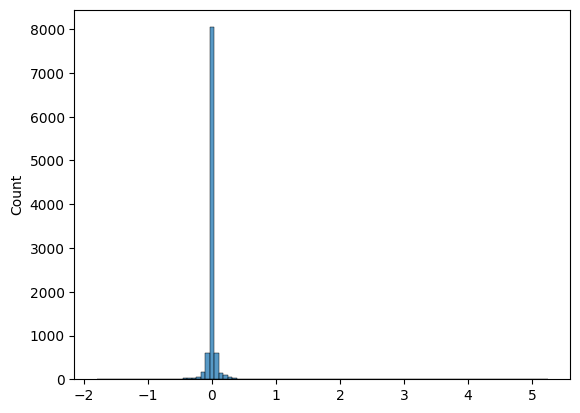

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

traces = np.trace(stresses, axis1=1, axis2=2)
fig, ax = plt.subplots()
sns.histplot(traces, ax=ax, bins=100)